# STATGR 5432 Proejct 1: Happy Moments EDA

### the below notebook attempts to use the ancillary data sets to augment the analysis. 

## Most notably, using the sense data to identify counts of POS and SSL per each HMID.

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df = pd.DataFrame(pd.read_csv('/Users/matthewvitha/Downloads/cleaned_hm.csv'))
df.head(2)

,hmid,wid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category
0,27673,2053,24h,I went on a successful date with someone I fel...,I went on a successful date with someone I fel...,True,1,NaN,affection
1,27674,2,24h,I was happy when my son got 90% marks in his e...,I was happy when my son got 90% marks in his e...,True,1,NaN,affection


In [12]:
df_sense = pd.DataFrame(pd.read_csv('/Users/matthewvitha/Downloads/senselabel (2).csv'))
df_sense.head(4)

,hmid,tokenOffset,word,lowercaseLemma,POS,MWE,offsetParent,supersenseLabel
0,31526,1,I,i,PRON,O,0,NaN
1,31526,2,found,find,VERB,O,0,v.cognition
2,31526,3,a,a,DET,O,0,NaN
3,31526,4,silver,silver,ADJ,O,0,NaN


#### so now will try to group the sense df by hmid and count the number of diff pos and supersenselabel 

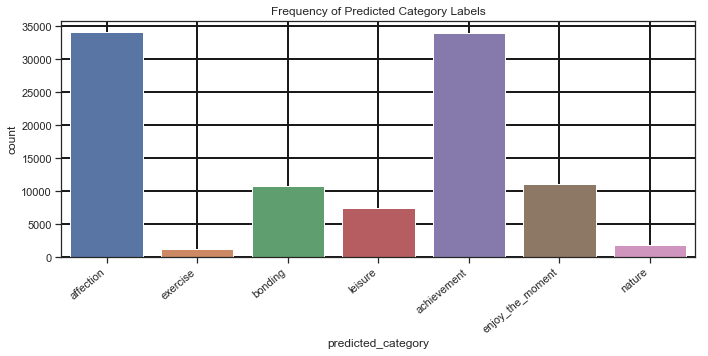

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

f, ax = plt.subplots(figsize=(10, 5))
ax = sns.countplot(x="predicted_category", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_axisbelow(True)
plt.tight_layout()
plt.title("Frequency of Predicted Category Labels")
plt.grid(True, color='k', linestyle='-', linewidth=2)
plt.show()


Text(0.5,1,'Frequency of Different POS')

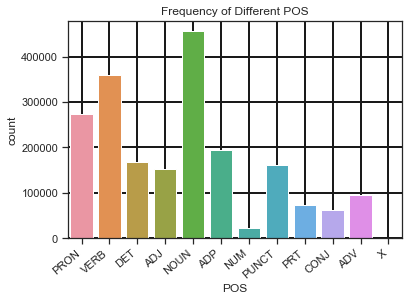

In [45]:
ax = sns.countplot(x="POS", data=df_sense)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.grid(True, color='k', linestyle='-', linewidth=2)
plt.title('Frequency of Different POS')

In [14]:
df_sense['POS'].unique()

array(['PRON', 'VERB', 'DET', 'ADJ', 'NOUN', 'ADP', 'NUM', 'PUNCT', 'PRT',
       'CONJ', 'ADV', 'X'], dtype=object)

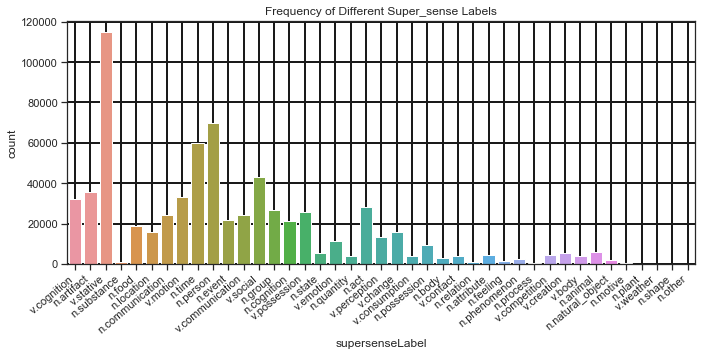

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

f, ax = plt.subplots(figsize=(10, 5))
ax = sns.countplot(x="supersenseLabel", data=df_sense)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.title("Frequency of Different Super_sense Labels")
plt.grid(True, color='k', linestyle='-', linewidth=2)
plt.show()


In [138]:
df_sense['supersenseLabel'].unique()

array([nan, 'v.cognition', 'n.artifact', 'v.stative', 'n.substance',
       'n.food', 'n.location', 'n.communication', 'v.motion', 'n.time',
       'n.person', 'n.event', 'v.communication', 'v.social', 'n.group',
       'n.cognition', 'v.possession', 'n.state', 'v.emotion',
       'n.quantity', 'n.act', 'v.perception', 'v.change', 'v.consumption',
       'n.possession', 'n.body', 'v.contact', 'n.relation', 'n.attribute',
       'n.feeling', 'n.phenomenon', 'n.process', 'v.competition',
       'v.creation', 'v.body', 'n.animal', 'n.natural_object', 'n.motive',
       'n.plant', 'v.weather', 'n.shape', 'n.other'], dtype=object)

In [7]:
df.loc[1,'cleaned_hm']

'I was happy when my son got 90% marks in his examination '

In [8]:
df_sense['supersenseLabel'].fillna('hello',inplace=True)

In [9]:
#df_sense.fillna({x:" " for x in ['supersenseLabel']}, inplace=True) # also works

In [10]:
df_sense['supersenseLabel'].head(2)

0          hello
1    v.cognition
Name: supersenseLabel, dtype: object

In [11]:
df_sense.head(2)

,hmid,tokenOffset,word,lowercaseLemma,POS,MWE,offsetParent,supersenseLabel
0,31526,1,I,i,PRON,O,0,hello
1,31526,2,found,find,VERB,O,0,v.cognition


In [12]:
df_sensezz = pd.DataFrame(df_sense['supersenseLabel'])

In [13]:
df_sensezz.to_csv('sensedff', sep='\t')

In [14]:
df_sense['hmid'].isna().value_counts()


False    2017463
Name: hmid, dtype: int64

In [15]:
df_sense['supersenseLabel'].isna().value_counts()

False    2017463
Name: supersenseLabel, dtype: int64

In [16]:
type(df_sense['supersenseLabel'])

pandas.core.series.Series

In [17]:
df_sense['hmid'].isna().values.any()

False

In [18]:
df_sense_cognition_count = pd.DataFrame(df_sense.groupby(['hmid'])['supersenseLabel'].apply(lambda x: x[x.str.contains('v.cognition')].count()))

In [19]:
df_sense_cognition_count.head(2)

,supersenseLabel
hmid,
27673,1
27674,0


In [20]:
df_sense_cognition_count.columns = ['ssl_cognition_count']

In [21]:
df_sense_artifact_count = pd.DataFrame(df_sense.groupby(['hmid'])['supersenseLabel'].apply(lambda x: x[x.str.contains('n.artifact')].count()))
df_sense_artifact_count.head(2)

,supersenseLabel
hmid,
27673,0
27674,0


In [22]:
df_sense_artifact_count.columns = ['ssl_artifact_count']

In [23]:
df_sense_stative_count = pd.DataFrame(df_sense.groupby(['hmid'])['supersenseLabel'].apply(lambda x: x[x.str.contains('v.stative')].count()))
df_sense_stative_count.head(2)

,supersenseLabel
hmid,
27673,0
27674,1


In [24]:
df_sense_stative_count.columns = ['ssl_stative_count']

In [25]:
df_sense_substance_count = pd.DataFrame(df_sense.groupby(['hmid'])['supersenseLabel'].apply(lambda x: x[x.str.contains('n.substance')].count()))
df_sense_substance_count.head(2)

,supersenseLabel
hmid,
27673,0
27674,0


In [26]:
df_sense_substance_count.columns = ['ssl_substance_count']

In [27]:
df_sense_food_count = pd.DataFrame(df_sense.groupby(['hmid'])['supersenseLabel'].apply(lambda x: x[x.str.contains('n.food')].count()))
df_sense_food_count.head(2)

,supersenseLabel
hmid,
27673,0
27674,0


In [28]:
df_sense_food_count.columns = ['ssl_food_count']

In [29]:
df_sense_location_count = pd.DataFrame(df_sense.groupby(['hmid'])['supersenseLabel'].apply(lambda x: x[x.str.contains('n.location')].count()))
df_sense_location_count.head(2)

,supersenseLabel
hmid,
27673,0
27674,0


In [30]:
df_sense_location_count.columns = ['ssl_location_count']

In [31]:
df_sense_communication_count = pd.DataFrame(df_sense.groupby(['hmid'])['supersenseLabel'].apply(lambda x: x[x.str.contains('n.communication')].count()))
df_sense_communication_count.head(2)

,supersenseLabel
hmid,
27673,0
27674,0


In [32]:
df_sense_communication_count.columns = ['ssl_communication_count']

In [33]:
df_sense_motion_count = pd.DataFrame(df_sense.groupby(['hmid'])['supersenseLabel'].apply(lambda x: x[x.str.contains('v.motion')].count()))
df_sense_motion_count.head(2)

,supersenseLabel
hmid,
27673,1
27674,0


In [34]:
df_sense_motion_count.columns = ['ssl_motion_count']

In [35]:
df_sense_time_count = pd.DataFrame(df_sense.groupby(['hmid'])['supersenseLabel'].apply(lambda x: x[x.str.contains('n.time')].count()))
df_sense_time_count.head(2)

,supersenseLabel
hmid,
27673,1
27674,0


In [36]:
df_sense_time_count.columns = ['ssl_time_count']

In [37]:
df_sense_person_count = pd.DataFrame(df_sense.groupby(['hmid'])['supersenseLabel'].apply(lambda x: x[x.str.contains('n.person')].count()))
df_sense_person_count.head(2)

,supersenseLabel
hmid,
27673,0
27674,1


In [38]:
df_sense_person_count.columns = ['ssl_person_count']

In [39]:
df_sense_event_count = pd.DataFrame(df_sense.groupby(['hmid'])['supersenseLabel'].apply(lambda x: x[x.str.contains('n.event')].count()))
df_sense_event_count.head(2)

,supersenseLabel
hmid,
27673,0
27674,0


In [40]:
df_sense_event_count.columns = ['ssl_event_count']

In [41]:
df_sense_communication_count = pd.DataFrame(df_sense.groupby(['hmid'])['supersenseLabel'].apply(lambda x: x[x.str.contains('v.communication')].count()))
df_sense_communication_count.head(2)

,supersenseLabel
hmid,
27673,0
27674,0


In [42]:
df_sense_communication_count.columns = ['ssl_communication_count']

In [43]:
df_sense_social_count = pd.DataFrame(df_sense.groupby(['hmid'])['supersenseLabel'].apply(lambda x: x[x.str.contains('v.social')].count()))
df_sense_social_count.head(2)

,supersenseLabel
hmid,
27673,0
27674,0


In [44]:
df_sense_social_count.columns = ['ssl_social_count']

In [45]:
df_sense_group_count = pd.DataFrame(df_sense.groupby(['hmid'])['supersenseLabel'].apply(lambda x: x[x.str.contains('n.group')].count()))
df_sense_group_count.head(2)

,supersenseLabel
hmid,
27673,0
27674,0


In [46]:
df_sense_group_count.columns = ['ssl_group_count']

In [47]:
df_sense_possession_count = pd.DataFrame(df_sense.groupby(['hmid'])['supersenseLabel'].apply(lambda x: x[x.str.contains('v.possession')].count()))
df_sense_possession_count.head(2)

,supersenseLabel
hmid,
27673,0
27674,1


In [48]:
df_sense_possession_count.columns = ['ssl_possession_count']

In [49]:
df_sense_state_count = pd.DataFrame(df_sense.groupby(['hmid'])['supersenseLabel'].apply(lambda x: x[x.str.contains('n.state')].count()))
df_sense_state_count.head(2)

,supersenseLabel
hmid,
27673,0
27674,0


In [50]:
df_sense_state_count.columns = ['ssl_state_count']

In [51]:
df_sense_emotion_count = pd.DataFrame(df_sense.groupby(['hmid'])['supersenseLabel'].apply(lambda x: x[x.str.contains('v.emotion')].count()))
df_sense_emotion_count.head(2)

,supersenseLabel
hmid,
27673,0
27674,0


In [52]:
df_sense_emotion_count.columns = ['ssl_emotion_count']

In [53]:
df_sense_quantity_count = pd.DataFrame(df_sense.groupby(['hmid'])['supersenseLabel'].apply(lambda x: x[x.str.contains('n.quantity')].count()))
df_sense_quantity_count.head(2)

,supersenseLabel
hmid,
27673,0
27674,1


In [54]:
df_sense_quantity_count.columns = ['ssl_quantity_count']

In [55]:
df_sense_act_count = pd.DataFrame(df_sense.groupby(['hmid'])['supersenseLabel'].apply(lambda x: x[x.str.contains('n.act')].count()))
df_sense_act_count.head(2)

,supersenseLabel
hmid,
27673,0
27674,1


In [56]:
df_sense_act_count.columns = ['ssl_act_count']

In [57]:
df_sense_perception_count = pd.DataFrame(df_sense.groupby(['hmid'])['supersenseLabel'].apply(lambda x: x[x.str.contains('v.perception')].count()))
df_sense_perception_count.head(2)

,supersenseLabel
hmid,
27673,0
27674,0


In [58]:
df_sense_perception_count.columns = ['ssl_perception_count']

In [59]:
df_sense_change_count = pd.DataFrame(df_sense.groupby(['hmid'])['supersenseLabel'].apply(lambda x: x[x.str.contains('v.change')].count()))
df_sense_change_count.head(2)

,supersenseLabel
hmid,
27673,0
27674,0


In [60]:
df_sense_change_count.columns = ['ssl_change_count']

In [61]:
df_sense_consumption_count = pd.DataFrame(df_sense.groupby(['hmid'])['supersenseLabel'].apply(lambda x: x[x.str.contains('v.consumption')].count()))
df_sense_consumption_count.head(2)

,supersenseLabel
hmid,
27673,0
27674,0


In [62]:
df_sense_consumption_count.columns = ['ssl_consumption_count']

In [63]:
df_sense_possession_count = pd.DataFrame(df_sense.groupby(['hmid'])['supersenseLabel'].apply(lambda x: x[x.str.contains('n.possession')].count()))
df_sense_possession_count.head(2)

,supersenseLabel
hmid,
27673,0
27674,0


In [64]:
df_sense_possession_count.columns = ['ssl_possession_count']

In [65]:
df_sense_body_count = pd.DataFrame(df_sense.groupby(['hmid'])['supersenseLabel'].apply(lambda x: x[x.str.contains('n.body')].count()))
df_sense_body_count.head(2)

,supersenseLabel
hmid,
27673,0
27674,0


In [66]:
df_sense_body_count.columns = ['ssl_body_count']

In [67]:
df_sense_contact_count = pd.DataFrame(df_sense.groupby(['hmid'])['supersenseLabel'].apply(lambda x: x[x.str.contains('v.contact')].count()))
df_sense_contact_count.head(2)

,supersenseLabel
hmid,
27673,0
27674,0


In [68]:
df_sense_contact_count.columns = ['ssl_contact_count']

In [69]:
df_sense_relation_count = pd.DataFrame(df_sense.groupby(['hmid'])['supersenseLabel'].apply(lambda x: x[x.str.contains('n.relation')].count()))
df_sense_relation_count.head(2)

,supersenseLabel
hmid,
27673,0
27674,0


In [70]:
df_sense_relation_count.columns = ['ssl_relation_count']

In [71]:
df_sense_attribute_count = pd.DataFrame(df_sense.groupby(['hmid'])['supersenseLabel'].apply(lambda x: x[x.str.contains('n.attribute')].count()))
df_sense_attribute_count.head(2)

,supersenseLabel
hmid,
27673,0
27674,0


In [72]:
df_sense_attribute_count.columns = ['ssl_attribute_count']

In [73]:
df_sense_feeling_count = pd.DataFrame(df_sense.groupby(['hmid'])['supersenseLabel'].apply(lambda x: x[x.str.contains('n.feeling')].count()))
df_sense_feeling_count.head(2)

,supersenseLabel
hmid,
27673,1
27674,0


In [74]:
df_sense_feeling_count.columns = ['ssl_feeling_count']

In [75]:
df_sense_phenomenon_count = pd.DataFrame(df_sense.groupby(['hmid'])['supersenseLabel'].apply(lambda x: x[x.str.contains('n.phenomenon')].count()))
df_sense_phenomenon_count.head(2)

,supersenseLabel
hmid,
27673,0
27674,0


In [76]:
df_sense_phenomenon_count.columns = ['ssl_phenomenon_count']

In [77]:
df_sense_process_count = pd.DataFrame(df_sense.groupby(['hmid'])['supersenseLabel'].apply(lambda x: x[x.str.contains('n.process')].count()))
df_sense_process_count.head(2)

,supersenseLabel
hmid,
27673,0
27674,0


In [78]:
df_sense_process_count.columns = ['ssl_process_count']

In [79]:
df_sense_competition_count = pd.DataFrame(df_sense.groupby(['hmid'])['supersenseLabel'].apply(lambda x: x[x.str.contains('v.competition')].count()))
df_sense_competition_count.head(2)

,supersenseLabel
hmid,
27673,0
27674,0


In [80]:
df_sense_competition_count.columns = ['ssl_competition_count']

In [81]:
df_sense_creation_count = pd.DataFrame(df_sense.groupby(['hmid'])['supersenseLabel'].apply(lambda x: x[x.str.contains('v.creation')].count()))
df_sense_creation_count.head(2)

,supersenseLabel
hmid,
27673,0
27674,0


In [82]:
df_sense_creation_count.columns = ['ssl_creation_count']

In [83]:
df_sense_body_count = pd.DataFrame(df_sense.groupby(['hmid'])['supersenseLabel'].apply(lambda x: x[x.str.contains('v.body')].count()))
df_sense_body_count.head(2)

,supersenseLabel
hmid,
27673,0
27674,0


In [84]:
df_sense_body_count.columns = ['ssl_body_count']

In [85]:
df_sense_animal_count = pd.DataFrame(df_sense.groupby(['hmid'])['supersenseLabel'].apply(lambda x: x[x.str.contains('n.animal')].count()))
df_sense_animal_count.head(2)

,supersenseLabel
hmid,
27673,0
27674,0


In [86]:
df_sense_animal_count.columns = ['ssl_animal_count']

In [87]:
df_sense_naturalobject_count = pd.DataFrame(df_sense.groupby(['hmid'])['supersenseLabel'].apply(lambda x: x[x.str.contains('n.natural_object')].count()))
df_sense_naturalobject_count.head(2)

,supersenseLabel
hmid,
27673,0
27674,0


In [88]:
df_sense_naturalobject_count.columns = ['ssl_naturalobject_count']

In [89]:
df_sense_motive_count = pd.DataFrame(df_sense.groupby(['hmid'])['supersenseLabel'].apply(lambda x: x[x.str.contains('n.motive')].count()))
df_sense_motive_count.head(2)

,supersenseLabel
hmid,
27673,0
27674,0


In [90]:
df_sense_motive_count.columns = ['ssl_motive_count']

In [91]:
df_sense_plant_count = pd.DataFrame(df_sense.groupby(['hmid'])['supersenseLabel'].apply(lambda x: x[x.str.contains('n.plant')].count()))
df_sense_plant_count.head(2)

,supersenseLabel
hmid,
27673,0
27674,0


In [92]:
df_sense_plant_count.columns = ['ssl_plant_count']

In [93]:
df_sense_weather_count = pd.DataFrame(df_sense.groupby(['hmid'])['supersenseLabel'].apply(lambda x: x[x.str.contains('v.weather')].count()))
df_sense_weather_count.head(2)

,supersenseLabel
hmid,
27673,0
27674,0


In [94]:
df_sense_weather_count.columns = ['ssl_weather_count']

In [95]:
df_sense_shape_count = pd.DataFrame(df_sense.groupby(['hmid'])['supersenseLabel'].apply(lambda x: x[x.str.contains('n.shape')].count()))
df_sense_shape_count.head(2)

,supersenseLabel
hmid,
27673,0
27674,0


In [96]:
df_sense_shape_count.columns = ['ssl_shape_count']

In [97]:
df_sense_other_count = pd.DataFrame(df_sense.groupby(['hmid'])['supersenseLabel'].apply(lambda x: x[x.str.contains('n.other')].count()))
df_sense_other_count.head(2)

,supersenseLabel
hmid,
27673,0
27674,0


In [98]:
df_sense_other_count.columns = ['ssl_other_count']

In [99]:
frames_ssl = [df_sense_cognition_count,df_sense_artifact_count,df_sense_stative_count,df_sense_substance_count,df_sense_food_count,df_sense_location_count,df_sense_communication_count,df_sense_motion_count,df_sense_time_count,df_sense_person_count,df_sense_event_count,df_sense_social_count,df_sense_group_count,df_sense_possession_count,df_sense_quantity_count,df_sense_act_count,df_sense_perception_count,df_sense_change_count,df_sense_consumption_count,df_sense_body_count,df_sense_contact_count,df_sense_relation_count,df_sense_relation_count,df_sense_attribute_count,df_sense_feeling_count,df_sense_phenomenon_count,df_sense_process_count,df_sense_competition_count,df_sense_creation_count,df_sense_animal_count,df_sense_naturalobject_count,df_sense_motive_count,df_sense_plant_count,df_sense_weather_count,df_sense_shape_count,df_sense_other_count]

In [100]:
result2 = pd.DataFrame(pd.concat(frames_ssl,axis=1).reset_index())

In [101]:
result2.head(2)

,hmid,ssl_cognition_count,ssl_artifact_count,ssl_stative_count,ssl_substance_count,ssl_food_count,ssl_location_count,ssl_communication_count,ssl_motion_count,ssl_time_count,...,ssl_process_count,ssl_competition_count,ssl_creation_count,ssl_animal_count,ssl_naturalobject_count,ssl_motive_count,ssl_plant_count,ssl_weather_count,ssl_shape_count,ssl_other_count
0,27673,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,27674,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
df_sense_noun_count = pd.DataFrame(df_sense.groupby(['hmid'])['POS'].apply(lambda x: x[x.str.contains('NOUN')].count()))

In [103]:
df_sense_noun_count.columns = ['pos_count_noun']
df_sense_noun_count.head(2)


,pos_count_noun
hmid,
27673,3
27674,4


In [104]:
df_sense_verb_count = pd.DataFrame(df_sense.groupby(['hmid'])['POS'].apply(lambda x: x[x.str.contains('VERB')].count()))
df_sense_verb_count.columns = ['pos_count_verb']
df_sense_verb_count.head(2)

,pos_count_verb
hmid,
27673,2
27674,2


In [105]:
df_sense_det_count = pd.DataFrame(df_sense.groupby(['hmid'])['POS'].apply(lambda x: x[x.str.contains('DET')].count()))
df_sense_det_count.columns = ['pos_count_det']
df_sense_det_count.head(2)

,pos_count_det
hmid,
27673,1
27674,0


In [106]:
df_sense_pron_count = pd.DataFrame(df_sense.groupby(['hmid'])['POS'].apply(lambda x: x[x.str.contains('PRON')].count()))
df_sense_pron_count.columns = ['pos_count_pron']
df_sense_pron_count.head(2)

,pos_count_pron
hmid,
27673,2
27674,3


In [107]:
df_sense_adj_count = pd.DataFrame(df_sense.groupby(['hmid'])['POS'].apply(lambda x: x[x.str.contains('ADJ')].count()))
df_sense_adj_count.columns = ['pos_count_adj']
df_sense_adj_count.head(2)

,pos_count_adj
hmid,
27673,2
27674,1


In [108]:
df_sense_adp_count = pd.DataFrame(df_sense.groupby(['hmid'])['POS'].apply(lambda x: x[x.str.contains('ADP')].count()))
df_sense_adp_count.columns = ['pos_count_adp']
df_sense_adp_count.head(2)

,pos_count_adp
hmid,
27673,3
27674,1


In [109]:
df_sense_num_count = pd.DataFrame(df_sense.groupby(['hmid'])['POS'].apply(lambda x: x[x.str.contains('NUM')].count()))
df_sense_num_count.columns = ['pos_count_num']
df_sense_num_count.head(2)

,pos_count_num
hmid,
27673,0
27674,1


In [110]:
df_sense_punct_count = pd.DataFrame(df_sense.groupby(['hmid'])['POS'].apply(lambda x: x[x.str.contains('PUNCT')].count()))
df_sense_punct_count.columns = ['pos_count_punct']
df_sense_punct_count.head(2)

,pos_count_punct
hmid,
27673,1
27674,0


In [111]:
df_sense_prt_count = pd.DataFrame(df_sense.groupby(['hmid'])['POS'].apply(lambda x: x[x.str.contains('PRT')].count()))
df_sense_prt_count.columns = ['pos_count_prt']
df_sense_prt_count.head(2)

,pos_count_prt
hmid,
27673,0
27674,0


In [112]:
df_sense_conj_count = pd.DataFrame(df_sense.groupby(['hmid'])['POS'].apply(lambda x: x[x.str.contains('CONJ')].count()))
df_sense_conj_count.columns = ['pos_count_conj']
df_sense_conj_count.head(2)

,pos_count_conj
hmid,
27673,1
27674,0


In [113]:
df_sense_adv_count = pd.DataFrame(df_sense.groupby(['hmid'])['POS'].apply(lambda x: x[x.str.contains('ADV')].count()))
df_sense_adv_count.columns = ['pos_count_adv']
df_sense_adv_count.head(2)

,pos_count_adv
hmid,
27673,0
27674,1


In [114]:
df_sense_x_count = pd.DataFrame(df_sense.groupby(['hmid'])['POS'].apply(lambda x: x[x.str.contains('X')].count()))
df_sense_x_count.columns = ['pos_count_x']
df_sense_x_count.head(2)

,pos_count_x
hmid,
27673,0
27674,0


In [115]:
frames = [df_sense_adj_count,df_sense_adp_count,df_sense_adv_count,df_sense_conj_count,df_sense_det_count,df_sense_noun_count,df_sense_num_count,df_sense_pron_count,df_sense_prt_count,df_sense_punct_count,df_sense_verb_count,df_sense_x_count]

In [116]:
result1 = pd.concat(frames,axis=1)

In [117]:
result1.head(1)

,pos_count_adj,pos_count_adp,pos_count_adv,pos_count_conj,pos_count_det,pos_count_noun,pos_count_num,pos_count_pron,pos_count_prt,pos_count_punct,pos_count_verb,pos_count_x
hmid,,,,,,,,,,,,
27673,2,3,0,1,1,3,0,2,0,1,2,0


In [118]:
df_vad = pd.DataFrame(pd.read_csv('/Users/matthewvitha/Downloads/vad.csv'))
df_vad.head(2)

,hmid,valency,dominance,arousal
0,31526,6.614000,5.840000,3.750000
1,37050,5.663158,5.461579,3.983947


In [119]:
df_and_vad = pd.merge(df,df_vad,how='inner')

In [120]:
df_and_vad.head(2)

,hmid,wid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category,valency,dominance,arousal
0,27673,2053,24h,I went on a successful date with someone I fel...,I went on a successful date with someone I fel...,True,1,NaN,affection,6.8775,6.482500,4.235000
1,27674,2,24h,I was happy when my son got 90% marks in his e...,I was happy when my son got 90% marks in his e...,True,1,NaN,affection,6.8100,5.753333,4.993333


In [121]:
df_and_vad.dtypes

hmid                       int64
wid                        int64
reflection_period         object
original_hm               object
cleaned_hm                object
modified                    bool
num_sentence               int64
ground_truth_category     object
predicted_category        object
valency                  float64
dominance                float64
arousal                  float64
dtype: object

In [122]:
result_try.dtypes

NameError: name 'result_try' is not defined

In [123]:
result_try = result1

In [124]:
print(result1.shape)
print(df_and_vad.shape)

(100535, 12)
(100535, 12)


In [125]:
result_try = result_try.reset_index()

In [126]:
result_try.head()

,hmid,pos_count_adj,pos_count_adp,pos_count_adv,pos_count_conj,pos_count_det,pos_count_noun,pos_count_num,pos_count_pron,pos_count_prt,pos_count_punct,pos_count_verb,pos_count_x
0,27673,2,3,0,1,1,3,0,2,0,1,2,0
1,27674,1,1,1,0,0,4,1,3,0,0,2,0
2,27675,0,0,0,1,2,3,0,1,1,1,2,0
3,27676,3,2,1,1,3,4,0,4,1,2,6,0
4,27677,0,2,0,0,0,4,0,1,1,0,2,0


In [127]:
df_finalsense_counts = pd.concat([df_and_vad,result_try,result2],axis=1)

In [128]:
df_finalsense_counts.head(2)

,hmid,wid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category,valency,...,ssl_process_count,ssl_competition_count,ssl_creation_count,ssl_animal_count,ssl_naturalobject_count,ssl_motive_count,ssl_plant_count,ssl_weather_count,ssl_shape_count,ssl_other_count
0,27673,2053,24h,I went on a successful date with someone I fel...,I went on a successful date with someone I fel...,True,1,NaN,affection,6.8775,...,0,0,0,0,0,0,0,0,0,0
1,27674,2,24h,I was happy when my son got 90% marks in his e...,I was happy when my son got 90% marks in his e...,True,1,NaN,affection,6.8100,...,0,0,0,0,0,0,0,0,0,0


In [129]:
df_finalsense_counts.shape

(100535, 62)

In [16]:
df_demo = pd.DataFrame(pd.read_csv('/Users/matthewvitha/Downloads/demographic (1).csv'))
df_demo.head(2)

,wid,age,country,gender,marital,parenthood
0,1,37.0,USA,m,married,y
1,2,29.0,IND,m,married,y


In [17]:
df_demo.sample(3)

,wid,age,country,gender,marital,parenthood
2183,2202,63,USA,m,married,y
8673,10755,22.0,USA,f,single,n
1869,1882,31,USA,f,married,n


In [18]:
df_demo.dtypes

wid            int64
age           object
country       object
gender        object
marital       object
parenthood    object
dtype: object

In [19]:
df_demo_age = pd.DataFrame(pd.read_csv('/Users/matthewvitha/Downloads/demo_age.csv'))

/Users/matthewvitha/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Age Distribution')

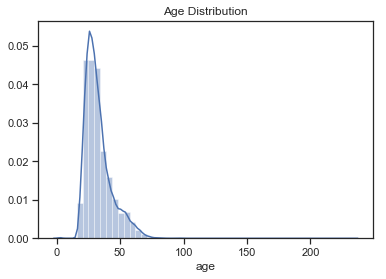

In [20]:
df_demo_age = df_demo_age.dropna()
sns.distplot(df_demo_age['age'])
plt.title('Age Distribution')

In [21]:
import pickle
pickle.dump(df_finalsense_counts, open( "df_finalsense_counts", "wb" ) )

NameError: name 'df_finalsense_counts' is not defined

In [22]:
df_finalsense_counts = pickle.load( open('df_finalsense_counts','rb'))

In [23]:
df_finalsense_counts.head(2)

,hmid,wid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category,valency,...,ssl_process_count,ssl_competition_count,ssl_creation_count,ssl_animal_count,ssl_naturalobject_count,ssl_motive_count,ssl_plant_count,ssl_weather_count,ssl_shape_count,ssl_other_count
0,27673,2053,24h,I went on a successful date with someone I fel...,I went on a successful date with someone I fel...,True,1,NaN,affection,6.8775,...,0,0,0,0,0,0,0,0,0,0
1,27674,2,24h,I was happy when my son got 90% marks in his e...,I was happy when my son got 90% marks in his e...,True,1,NaN,affection,6.8100,...,0,0,0,0,0,0,0,0,0,0


In [24]:
df['hm_length']  = df['cleaned_hm'].str.len()

In [25]:
df.head(2)

,hmid,wid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category,hm_length
0,27673,2053,24h,I went on a successful date with someone I fel...,I went on a successful date with someone I fel...,True,1,NaN,affection,77
1,27674,2,24h,I was happy when my son got 90% marks in his e...,I was happy when my son got 90% marks in his e...,True,1,NaN,affection,57


In [195]:
df['cleaned_hm'].isnull().values.any()

False

In [196]:
df['hm_length'].isnull().values.any()

False

In [197]:
df['predicted_category'].isnull().values.any()

False

/Users/matthewvitha/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'HM Length Distribution')

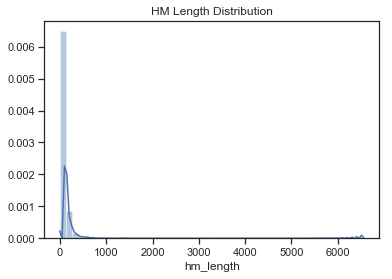

In [26]:
df_demo_age = df_demo_age.dropna()
sns.distplot(df['hm_length'])
plt.title('HM Length Distribution')

In [28]:
df.sort_values(by=['hm_length'], ascending=False).head(200)

,hmid,wid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category,hm_length
27747,55573,508,24h,This is the second essay in a two-part series ...,This is the second essay in a two-part series ...,True,58,NaN,affection,6557
127,27800,455,24h,This is the second essay in a two-part series ...,This is the second essay in a two-part series ...,False,53,NaN,affection,6548
60804,88790,455,3m,My much awaited desired prolonged Velankanni t...,My much awaited desired prolonged Velankanni t...,False,60,NaN,affection,6530
49539,77472,721,3m,"\r\nHappiness is so interesting, because we al...","\r\nHappiness is so interesting, because we al...",False,42,NaN,enjoy_the_moment,5347
65875,93896,455,3m,Itas a trip to Kanyakumari from Bangalore. Kan...,Itas a trip to Kanyakumari from Bangalore. Kan...,False,69,NaN,affection,5167
95046,123244,455,24h,It is holiest of the seven sacred cities in Hi...,It is holiest of the seven sacred cities in Hi...,True,45,NaN,bonding,5109
47834,75762,455,3m,Can we plan for Tirupati Balaji Mandir on 17th...,Can we plan for Tirupati Balaji Mandir on 17th...,False,46,NaN,enjoy_the_moment,4601
42722,70624,455,3m,The Kashmiri doesnat care whose flag he follow...,The Kashmiri doesnat care whose flag he follow...,False,51,NaN,affection,4328
91334,119512,455,24h,We went to my cousinas wedding. It was a lovel...,We went to my cousinas wedding. It was a lovel...,False,40,affection,affection,4200
78083,106185,455,3m,"It was my second visit to Guruvayur, one of th...","It was my second visit to Guruvayur, one of th...",False,48,NaN,affection,4042


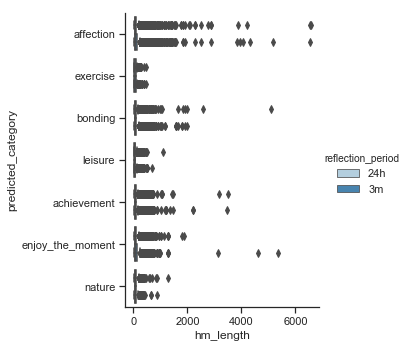

In [207]:
sns.catplot(x="hm_length", y="predicted_category",kind='box', palette="Blues",hue='reflection_period',data=df)
figsize=(50,50)

KeyboardInterrupt: 

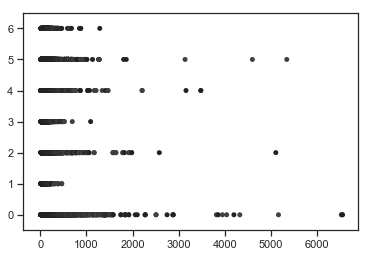

In [209]:
sns.swarmplot(x="hm_length", y="predicted_category", data=df,hue='reflection_period', color=".25")

## Pandas Profiling called to get some more eda here. 

In [47]:
import pandas_profiling

/Users/matthewvitha/anaconda/lib/python3.5/site-packages/pandas_profiling/plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/matthewvitha/anaconda/lib/python3.5/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/matthewvitha/anaconda/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/matthewvitha/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/matthewvitha/anaconda/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/matthewvitha/anaconda/lib/python3.5/site-packages/ipyke

In [160]:
result2.columns = result2.columns.str.strip()

In [1]:
result2.head(2)

NameError: name 'result2' is not defined

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sns.set(color_codes=True)

sns.distplot(result2['ssl_cognition_count'])
sns.plt.show()


In [161]:
pandas_profiling.ProfileReport(result2)

AttributeError: 'DataFrame' object has no attribute 'name'

In [151]:
pandas_profiling.ProfileReport(df_demo)

Number of variables,6
Number of observations,10844
Total Missing (%),0.4%
Total size in memory,508.4 KiB
Average record size in memory,48.0 B
Numeric,1
Categorical,5
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [ ]:
#pandas_profiling.ProfileReport(df_sense)

In [ ]:
#pandas_profiling.ProfileReport(df_vad_poscount_sslcount)

In [48]:
pandas_profiling.ProfileReport(df_demo_age)

Number of variables,3
Number of observations,10806
Total Missing (%),0.0%
Total size in memory,253.3 KiB
Average record size in memory,24.0 B
Numeric,3
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0
